In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
def read_in(feat,label): 
    ##Simple read function
    df_x = pd.read_csv(feat)
    x = df_x.values
    
    df_y = pd.read_csv(label)
    y = df_y.values
    return x,y

def mean_var(x): 
    '''Returns mean and variance of a set x'''
    ##Calculate avg, use axis=0 to take it along the values, not the features
    mu = np.mean(x,axis=0)
    std = np.mean((x - mu)*(x - mu), axis=0)
    return mu,std

def normalize(train,test): 
    '''Function calling both testing and training sets, 
    must be normalized by the mean and variance
    Normalize such that X = (X - mean)/sqrt(Var)'''
    ##Call the mean_var function
    mu,std = mean_var(train)
    ##Normalize
    train_norm = (train - mu)/(np.sqrt(std) +1e-15) ## 1e-15 added to avoid divide by 0 error
    test_norm = (test - mu)/(np.sqrt(std) +1e-15)
    return train_norm,test_norm

def add_bias(X): 
    '''Adds a bias term to make sure we don't fuck up the model too bad'''
    X_ones = np.ones(X.shape[0])
    X_ones = X_ones.reshape(-1,1)
    return np.append(X_ones,X,axis=1)

def plot_raw_digit(feat): 
    '''Takes a feature vector and plots it as an 8x8 pixel image
    Requires that the vector ranges from 0 to 16'''
    plt.gray()
    plt.matshow(feat.reshape(8,8))
    plt.show()

In [3]:
x_train, y_train = read_in('./data/Digits_0_1_X_train.csv',"./data/Digits_0_1_y_train.csv")
x_test, y_test = read_in('./data/Digits_0_1_X_test.csv',"./data/Digits_0_1_y_test.csv")
n_sample,n_feat = x_train.shape

In [32]:
##Normalize the features using Again. Just poached code from last class
## This set doesn't Actually need to be normalized, but it's good practice 
x_train_norm,x_test_norm = normalize(x_train,x_test)
x_train_norm_c0,x_test_norm_c0 = add_bias(x_train_norm),add_bias(x_test_norm)

<Figure size 432x288 with 0 Axes>

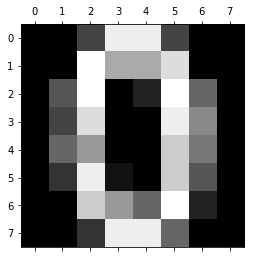

In [19]:
plot_raw_digit(x_train[105])

In [29]:
def result(x,c):
    '''Uses a sigmoid function to predict
    Requires that you calculate optimal coeffs
    Returns array of predicted values'''
    return 1/(1+np.exp(-x.dot(c)))

def loss(x,c,y): 
    '''Loss function for a gradient descent predictor
    This will be minimized using gradient descent
    L(c) = 1/M*Sum(y*log(p_c)-(1-y)*log(1-p_c))
    Designed to maximize when p_c = 1, minimize when p_c = 0
    Returns real value'''
    pred = result(x,c)
    s = np.sum(-y.T.dot(np.log(pred))-((1-y.T)).dot(np.log(1-pred)))
    return 1/x.shape[0]*s

def gradient_desc(X,y,l_rate=.01,ite=100,): 
    '''Input: 
    X-> Features (NxM), normalized w bias
    y->Labels (Nx1)
    learning rate (<<.01)
    Iterations->Number of times to run 
    
    Output: 
    c_n->Optimal coeffs
    loss->loss value based off 
    '''
    n_feat = X.shape[1] ##N value 
    c_n = np.zeros((n_feat,1)) ##initialize an empty matrix 
    loss_range = [0]*ite ##Empty matrix to document how loss changes with iteration
    for i in range(ite): 
        ##Calculate the gradient over a range
        ##Gradient of the loss function, this is the simplified version 
        ## dL/dc = X^t*(y_pred-y_true)
        grad = (1/X.shape[0])*(X.T).dot(result(X,c_n)-y)
        c_n -=l_rate*grad
        loss_range[i] = (loss(X,c_n,y)).ravel()
        
    return c_n, loss_range

def plot_loss(loss,ite): 
    ##Stolen from linreg
    plt.xlabel("Number of Iteration")
    plt.ylabel("Loss")
    plt.plot(loss)
    plt.show()

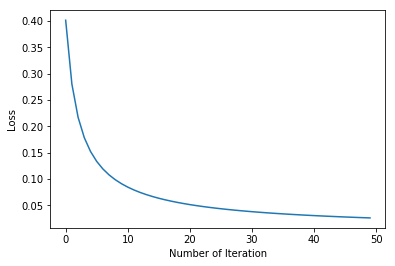

In [30]:
##Now we put it all together 
c, loss = gradient_desc(x_train_norm_c0, y_train, ite = 50, l_rate = 0.1)
plot_loss(loss,ite=50)

In [34]:
## Predict
y_predict = result(x_test_norm_c0,c)

In [39]:
## Have to calculate accuracy 
def acc(y_pre,y_true): 
    p = np.array(y_pre == y_true, dtype = int)
    return np.sum(p)/float(len(y_true))

def label_out(y_pre, threshold=.5): 
    label = np.copy(y_pre)
    label[label>threshold ] = 1
    label[label<threshold] = 0 
    return label.astype(int)

In [36]:
print("Accuracy:",acc(y_predict,y_test)) ##Oh Yikes

##This doesn't work because it requires that the sigmoid output is 1 or 0 
##Spoiler, it is not. 

Accuracy: 0.0


In [40]:
y_predict_true = label_out(y_predict)
print("True Accuracy:", acc(y_predict_true,y_test))

True Accuracy: 1.0
